<a href="https://colab.research.google.com/github/zhaojianghe16/MGMT401/blob/Dev/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is the "Bike Sharing". 

There are two data files: "BikeSharing_training.csv" and "BikeSharing_Xtest.csv"<br/>
Both files have the following fields, except cnt which is not available in "BikeSharing_Xtest.csv"

Features:
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

Target:
- cnt: count of total rental bikes


Training dataset, "BikeSharing_training.csv", contains 300 rows and 12 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "BikeSharing_Xtest.csv", contains 200 rows and 11 columns. This is the test set which only contains the features.<br/>

Your goal is to predict the number of total rental bikes (cnt) based on the features.

In [ ]:
import csv
import numpy as np
import pandas as pd

Load the training data and View the first 5 lines

In [ ]:
# Load the data
training_dataset= pd.read_csv('https://raw.githubusercontent.com/zhaojianghe16/Public_Save_File_Online/master/BikeSharing_training.csv')
test_dataset = pd.read_csv('https://raw.githubusercontent.com/zhaojianghe16/Public_Save_File_Online/master/BikeSharing-Xtest.csv')


# Show the first 5 lines
print(training_dataset.head()) 
print(test_dataset.head())


   season  mnth  hr  holiday  weekday  ...  temp   atemp   hum  windspeed  cnt
0       1    12  16        0        5  ...  0.42  0.4242  0.47     0.1940  283
1       4    10   9        0        0  ...  0.50  0.4848  0.55     0.4179  330
2       3     9   1        0        0  ...  0.62  0.5606  0.88     0.0000   88
3       3     6  22        0        3  ...  0.70  0.6364  0.42     0.1940  183
4       3     7  12        0        1  ...  0.80  0.7424  0.52     0.1642  314

[5 rows x 12 columns]
   season  mnth  hr  holiday  ...  temp   atemp   hum  windspeed
0       4    11  11        1  ...  0.42  0.4242  0.41     0.0896
1       1    12  13        0  ...  0.30  0.3030  0.49     0.1343
2       4    11  18        0  ...  0.44  0.4394  0.67     0.1045
3       4    10  16        0  ...  0.70  0.6515  0.54     0.2836
4       4    12  17        0  ...  0.28  0.3182  0.30     0.0000

[5 rows x 11 columns]


## Data Exploration
We can plot a histogram of the dataframe for the features: "temp", "atemp","hum","windspeed" to understand the distributions of the continuous values.<br/>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab1b5588>,
      dtype=object)

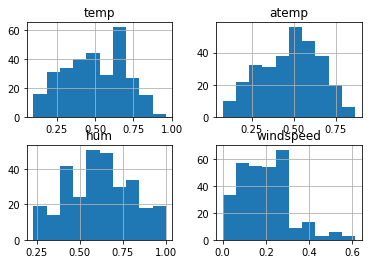

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
training_dataset[["temp", "atemp","hum","windspeed"]].hist()

##### Q1. What can you infer from the histograms? <br/>
Ans- 

Compute the correlation matrix to get an understanding of the correlation between profit and different kinds of expenditure.<br/>



In [ ]:
training_dataset.corr()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.795990,-0.046306,-0.057180,-0.049248,0.087355,0.097812,0.403317,0.406946,0.155086,-0.110663,0.225385
mnth,0.795990,1.000000,0.000608,-0.012655,0.001790,0.045749,0.098688,0.270690,0.265519,0.116613,-0.005633,0.144026
hr,-0.046306,0.000608,1.000000,0.104970,0.029337,-0.083801,-0.117088,0.049154,0.042834,-0.375612,0.162829,0.387503
holiday,-0.057180,-0.012655,0.104970,1.000000,-0.065359,-0.216498,-0.059273,0.023122,0.020936,-0.064204,-0.043506,0.018659
weekday,-0.049248,0.001790,0.029337,-0.065359,1.000000,0.096844,-0.088959,-0.057797,-0.071621,-0.098027,0.073404,0.067401
workingday,0.087355,0.045749,-0.083801,-0.216498,0.096844,1.000000,0.131374,-0.007330,-0.001266,0.168470,-0.000534,-0.072353
weathersit,0.097812,0.098688,-0.117088,-0.059273,-0.088959,0.131374,1.000000,-0.014367,-0.018496,0.403589,-0.047412,-0.167125
temp,0.403317,0.270690,0.049154,0.023122,-0.057797,-0.007330,-0.014367,1.000000,0.992783,-0.037122,-0.096506,0.435036
atemp,0.406946,0.265519,0.042834,0.020936,-0.071621,-0.001266,-0.018496,0.992783,1.000000,-0.017675,-0.126852,0.430083
hum,0.155086,0.116613,-0.375612,-0.064204,-0.098027,0.168470,0.403589,-0.037122,-0.017675,1.000000,-0.228720,-0.321508


##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans - 

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans - 

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with cnt as the outcome, which one would you choose and why? <br/>
Ans - 


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on "temp", "atemp","hum","windspeed"


In [ ]:
from sklearn.preprocessing import StandardScaler

feature = training_dataset[["temp", "atemp","hum","windspeed"]]
scaler = StandardScaler()
scaler.fit(feature)

print(feature.head())
feature=scaler.transform(feature )

print(feature[0:5])

   temp   atemp   hum  windspeed
0  0.42  0.4242  0.47     0.1940
1  0.50  0.4848  0.55     0.4179
2  0.62  0.5606  0.88     0.0000
3  0.70  0.6364  0.42     0.1940
4  0.80  0.7424  0.52     0.1642
[[-4.07572539e-01 -3.03587659e-01 -7.90860172e-01  5.40063916e-04]
 [ 6.55705186e-03  4.47228379e-02 -3.59579915e-01  1.83266598e+00]
 [ 6.27751439e-01  4.80398344e-01  1.41945115e+00 -1.58692054e+00]
 [ 1.04188103e+00  9.16073850e-01 -1.06041033e+00  5.40063916e-04]
 [ 1.55954302e+00  1.52532983e+00 -5.21310011e-01 -2.43306977e-01]]


##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans-

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- 

### One-Hot Encoding

"temp", "atemp","hum" and "windspeed" are continuous values whereas the others contain discrete values. E.g. "mnth" can only take on the integers from 1 to 12. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Perform one-hot encoding on all the categorical features and print the shape of your encoded array

In [ ]:
training_dataset['mnth'].shape

(300,)

In [ ]:
training_dataset.shape

(300, 12)

In [ ]:
training_dataset.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,12,16,0,5,1,1,0.42,0.4242,0.47,0.1940,283
1,4,10,9,0,0,0,2,0.50,0.4848,0.55,0.4179,330
2,3,9,1,0,0,0,2,0.62,0.5606,0.88,0.0000,88
3,3,6,22,0,3,1,1,0.70,0.6364,0.42,0.1940,183
4,3,7,12,0,1,1,2,0.80,0.7424,0.52,0.1642,314


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['mnth',
                        'season',
                        'holiday',
                        'weekday',
                        'workingday',
                        'weathersit']  

# Transform
 
onehot_encoder = OneHotEncoder()
categorical_features_df = onehot_encoder.fit_transform(training_dataset[categorical_features])

# Print the shape of your encoded X
categorical_features_df.shape

(300, 30)

##### Q7. What are the advantages and disadvantages of using One-hot encoding?<br/>
Ans-

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "cnt".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Bulding and fitting the Linear Regression model 
y_train = training_dataset['cnt']

regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)

# Evaluating the Linear Regression model by computing MSE on training set
from sklearn.metrics import mean_squared_error


print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

###### Q8. Print the value of bhat

In [ ]:
print(    )

###### Q9. Is there a problem of multicolinearity? Explain what you can do<br/>
Ans- 

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [ ]:
from sklearn.metrics import r2_score

#### R2 score for model with "temp" as predictor and "cnt" as outcome

In [ ]:
# Print R2 score





print( r2_score(y_true, y_pred) )

#### R2 score for model with "temp", "hum" as predictors and "cnt" as outcome

In [ ]:




# Print R2 score
print( r2_score(y_true, y_pred) )

#### R2 score for model with  "temp", "atemp", "hum" as predictors and "cnt" as outcome

In [ ]:


# Print R2 score
print( r2_score(y_true, y_pred) )

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors will always improve the predictive ability of your model, though it may not be meaningful.

That is to say, we are not necessarily interested in making a perfect prediciton of our data. If we were, we would always use all of the predictors available. Rather, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs nearly as well.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.
Using Adjusted R2 score, please give the most relevant combination of predictors in determining the profit of the startup.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

#### Adjusted R2 score for model with "temp" as predictor and "cnt" as outcome

In [ ]:


# Print Adjusted R2 score
def adjusted_R_squared(n, k, y_true,y_pred ): 
  adjusted_R_squared = 1- (1- (r2_score(y_true, y_pred))**2)*(n-1)/(n-k-1)
  return(adjusted_R_squared )


adjusted_R_squared(n=  , k =  , y_true=  ,y_pred = )


#### Adjusted R2 score for model with "temp", "hum" as predictors and "cnt" as outcome

In [ ]:


# Print Adjusted R2 score
adjusted_R_squared(n=  , k =  , y_true=  ,y_pred = )

#### Adjusted R2 score for model with  "temp", "atemp", "hum" as predictors and "cnt" as outcome

In [ ]:


# Print Adjusted R2 score
adjusted_R_squared(n=  , k =  , y_true=  ,y_pred = )

### K-fold Cross-Validation

However, adjusted R2 is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [ ]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y):
    # Write your code here
    
    
    # sample the data 

    # build model

    # predict 

    # store the error 

    # mean error 


    return()

# By using your above function, find the best combination of features, which has the lowest averaged MSE
cross_val_mse(X, y)




In [ ]:
# Print the best features 




### Test your model
Now, apply your best model to predict the target values from the test feature set "BikeSharing_Xtest.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [ ]:




# If use standardization and one-hot we need to apply them to the testing as well.




# Output your prediction on test set as y_pred. It should be a 200 x 1 vector.
# y_pred =

In [ ]:
#end